In [3]:
import sys, os
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import gym
from torch.autograd import Variable
%matplotlib notebook
import matplotlib.pyplot as plt
from project.models.networks import *
import project.util as util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
W = 2
D = 1
nonlin = 'elu'
cuda = True
bins = 100

loss_type = 'mse'
optim_type = 'rmsprop'
lr = 1e-2
l2 = 1e-3

fn = torch.sin
r = 2*np.pi
b = -np.pi

def_type = 'torch.FloatTensor'
if cuda and torch.cuda.is_available():
    def_type = 'torch.cuda.FloatTensor'
    print('Using cuda')
else:
    cuda = False

In [111]:
model = MLP(input_dim=1, output_dim=1, hidden_dims=[W]*D)
optim = get_optimizer(optim_type, model.parameters(), lr=lr, weight_decay=l2)
criterion = get_loss_type(loss_type)
loss_stat = util.AverageMeter()
hist = torch.zeros(bins)

if cuda:
    model.cuda()

In [112]:
B = 10000
itrs = 1000

In [117]:
for i in range(itrs):
    X = torch.rand(B, 1) * r + b
    hist += X.histc(bins=bins, min=b, max=r+b)
    
    Y = Variable(fn(X).type(def_type))
    X = Variable(X.type(def_type))
    
    loss = criterion(model(X), Y)
    
    loss_stat.update(loss.data[0])
    
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if i % 100 == 0:
        print('Iter {}/{}, loss: {:.4f} ({:.4f})'.format(i+1, itrs, loss_stat.val, loss_stat.avg))
    

C:\Users\anwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.
C:\Users\anwan\OneDrive - UW Office 365\Khan\DeepRL\project\util\stats.py:159: RuntimeWarning: invalid value encountered in sqrt
  self.std = np.sqrt(self.var)


Iter 1/1000, loss: 0.1172 (0.1816)
Iter 101/1000, loss: 0.0501 (0.1765)
Iter 201/1000, loss: 0.0433 (0.1705)
Iter 301/1000, loss: 0.0404 (0.1648)
Iter 401/1000, loss: 0.0384 (0.1596)
Iter 501/1000, loss: 0.0373 (0.1547)
Iter 601/1000, loss: 0.0370 (0.1502)
Iter 701/1000, loss: 0.0385 (0.1461)
Iter 801/1000, loss: 0.0391 (0.1422)
Iter 901/1000, loss: 0.0368 (0.1386)


<IPython.core.display.Javascript object>


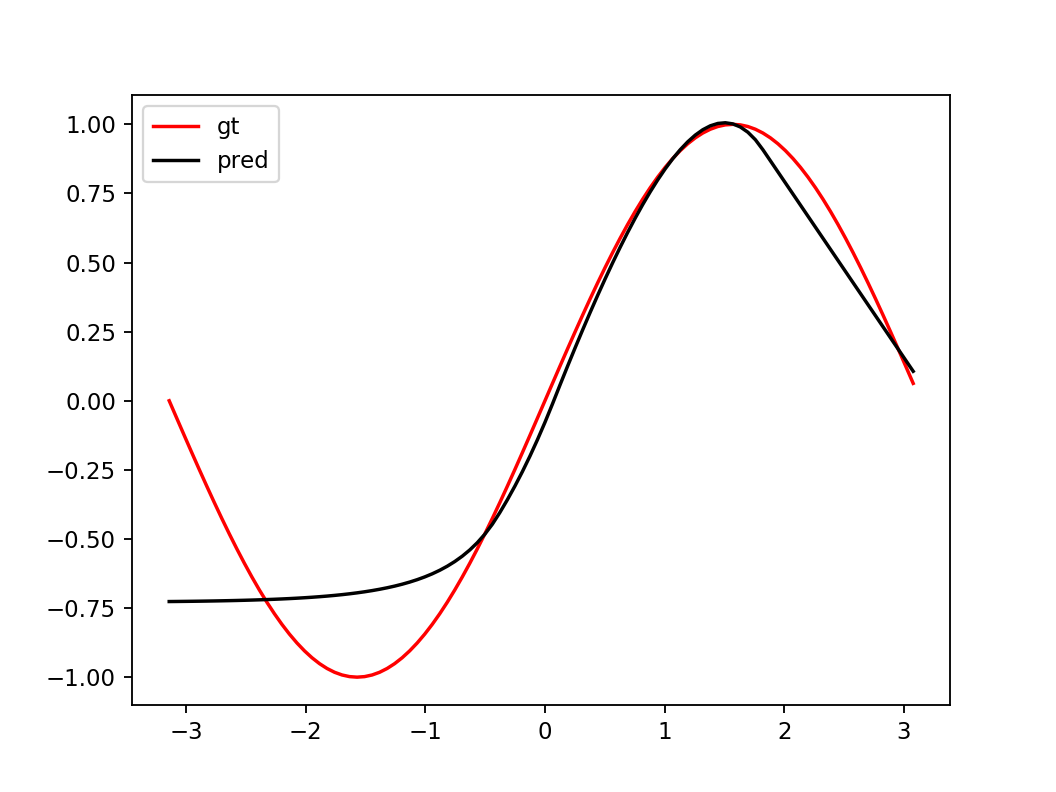

In [118]:
plt.figure()
x = torch.arange(0,1,1/100)*r+b
y = fn(x)
y_pred = model(Variable(x.type(def_type).unsqueeze(-1))).data.squeeze()
x, y, y_pred = map(util.to_np, [x, y, y_pred])
plt.plot(x, y, 'r', label='gt')
plt.plot(x, y_pred, 'k', label='pred')
plt.legend()

<IPython.core.display.Javascript object>


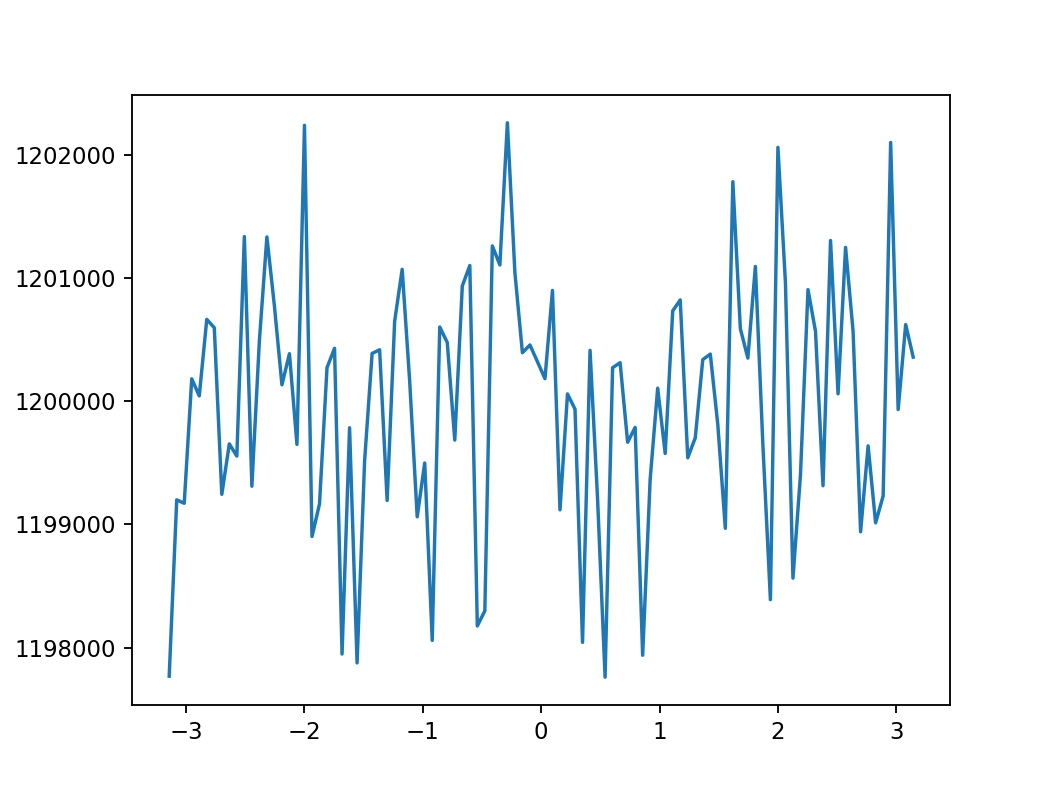

In [13]:
plt.figure()
plt.plot(np.linspace(b, r+b, bins), util.to_np(hist))